In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

from calculations import pointwise_similarity, series_similarity

In [2]:
print(pointwise_similarity.__doc__)


    Caluclates point-wise similarity of all points on a map to a reference point over time

    Parameters:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, lattitude
        x0 (int): X-Component of reference point
        y0 (int): Y-Component of reference point
        level (int): Level on which the similarity should be calculated
        simFunct (str): The similarity function that should be used. Default: Correlation Coefficient.
                            Options: "corr": Correlation Coefficient, more will follow

    Returns:
        sim (numpy.ndarray): 2 dimensional array with similarity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
#Choose a random point on the map
(x0, y0) = (np.random.randint(256), np.random.randint(512))
(x0, y0)

(12, 162)

In [5]:
#Define Level
level = 15

In [6]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [7]:
#Calculate point-wise similarities to (x0, y0) (Here: Correlation Coefficient)
sim = pointwise_similarity(map_array, x0, y0, level, simFunct="corr")     
            
sim        

array([[0.16039338, 0.16544159, 0.17037822, ..., 0.14456202, 0.14996769,
        0.15522856],
       [0.20181167, 0.20675362, 0.21162223, ..., 0.18642699, 0.1916393 ,
        0.19675423],
       [0.23336914, 0.23848901, 0.24356383, ..., 0.2176402 , 0.22293968,
        0.22817321],
       ...,
       [0.13059747, 0.13666347, 0.14257447, ..., 0.11130722, 0.1179149 ,
        0.12432565],
       [0.17607219, 0.18308858, 0.18994178, ..., 0.15364403, 0.16136524,
        0.16882906],
       [0.22458353, 0.23253257, 0.24028034, ..., 0.19901261, 0.20780442,
        0.21632341]])

In [ ]:
#2nd possibility: Convert point into series and calculate series similarity
referenceSeries = np.array([map_array[time, level, x0, y0] for time in range(map_array.shape[0])])
sim = series_similarity(map_array, referenceSeries, level, simFunct="corr")

sim

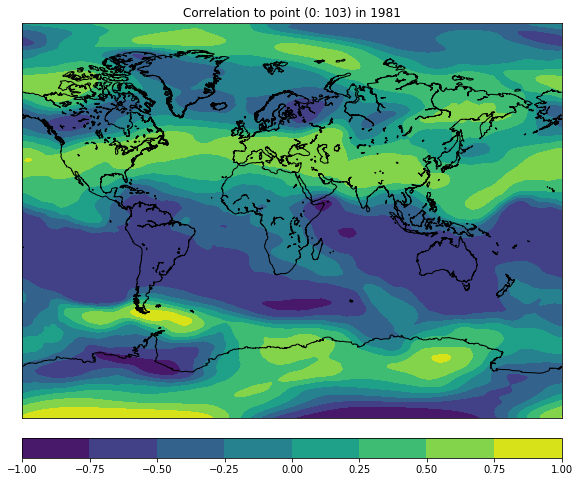

In [8]:
#Plot similarity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("Correlation to point (" + str(x0) + ": " + str(y0) + ") in 1981")
plt.show()